# Вариант 22

In [652]:
import sympy
import numpy as np
import control as ct
import control.matlab as ctm
import matplotlib.pyplot as plt
from sympy import I

dt = 0.001

In [653]:
def sympy_frac_to_tf(frac):
    num = list(map(complex, sympy.Poly(sympy.fraction(frac)[0], s).all_coeffs()))
    den = list(map(complex, sympy.Poly(sympy.fraction(frac)[1], s).all_coeffs()))
    
    return ct.tf(
        num,
        den
    )

In [654]:
def get_open_ss_by_lambdas(
        lambdas: list,
        num_sys: sympy.Expr,
        den_sys: sympy.Expr
) -> ct.ss:
    w_open = num_sys / den_sys
    w_open_n = w_open.subs({
        l1: lambdas[0],
        l2: lambdas[1],
        l3: lambdas[2],
        l4: lambdas[3],
        l5: lambdas[4],
    }).simplify()
    return ct.canonical_form(ct.tf2ss(sympy_frac_to_tf(w_open_n)), 'reachable')[0]
    

In [655]:
def get_num_sys(
        den_closed,
        den_open,
        lambdas
):
    return (den_closed - den_open.subs({
        l1: lambdas[0],
        l2: lambdas[1],
        l3: lambdas[2],
        l4: lambdas[3],
        l5: lambdas[4],
    })).simplify()

In [656]:
def get_closed_ss_by_lambdas(
        lambdas: list,
        num_sys: sympy.Expr,
        den_sys: sympy.Expr
) -> ct.ss:
    w_open = num_sys / den_sys
    w_closed = w_open / (1 + w_open)
    w_closed_n = w_closed.subs({
        l1: lambdas[0],
        l2: lambdas[1],
        l3: lambdas[2],
        l4: lambdas[3],
        l5: lambdas[4],
    }).simplify()
    return ct.canonical_form(ct.tf2ss(sympy_frac_to_tf(w_closed_n)), 'reachable')[0]
    

In [657]:
def get_step_response(
        ss: ct.ss,
        time: np.array
):
    return ct.step_response(ss, time).outputs

In [658]:
def plot_time_char(
        open_ss: ct.ss,
        closed_ss: ct.ss,
        time_limit
) -> None:
    time = np.linspace(0, time_limit, int(time_limit/dt))
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    
    fig.suptitle('step response')
    
    ax[0].plot(time, get_step_response(open_ss, time))
    ax[0].set_xlabel('time,s')
    ax[0].set_ylabel('y(t)')
    ax[0].grid(True)
    ax[0].set_title('open system')
    
    ax[1].plot(time, get_step_response(closed_ss, time))
    ax[1].set_xlabel('time,s')
    ax[1].set_ylabel('y(t)')
    ax[1].grid(True)
    ax[1].set_title('closed system')
    

## Задание 1

Всего 5 полюсов, из которых 1 вещественный и 4 комплексно-сопряженных. Возьмем для исследования три передаточные функции:

- первая передаточная функция должна иметь 2 неустойчивых полюса у разомкнутой системы и 4 неустойчивых полюса у замкнутой,
- вторая передаточная функция должна иметь 0 неустойчивых полюсов у разомкнутой системы и 4 у замкнутой,
- третья передаточная функция должна иметь 2 неустойчивых полюсов у разомкнутой системы и 0 у замкнутой.

In [659]:
s, l1, l2, l3, l4, l5 = sympy.symbols("s \lambda_1 \lambda_2 \lambda_3 \lambda_4 \lambda_5")
den = (s-l1)*(s-l2)*(s-l3)*(s-l4)*(s-l5)

### Первая

In [660]:
lambdas1 = [
    -0.5,
    0 - 1*I,
    0 + 1*I,
    1 + 1.5*I,
    1 - 1.5*I
]

In [661]:
den_closed_1 = (s - (-1))*(s - (1 + 2j))*(s - (1 - 2j))*(s - (3 + 1j))*(s - (3 - 1j))
num_1 = get_num_sys(
    den_closed_1,
    den,
    lambdas1
)
num_1

-5.5*s**4 + 15.75*s**3 - 23.125*s**2 - 2.25*s + 48.375

In [662]:
open_ss1 = get_open_ss_by_lambdas(
    lambdas1,
    num_1,
    den
)
closed_ss1 = get_closed_ss_by_lambdas(
    lambdas1,
    num_1,
    den
)
closed_ss1

StateSpace(array([[ 7.00000000e+00, -1.90000000e+01,  2.30000000e+01,
        -1.42108547e-14, -5.00000000e+01],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00]]), array([[1.],
       [0.],
       [0.],
       [0.],
       [0.]]), array([[ -5.5  ,  15.75 , -23.125,  -2.25 ,  48.375]]), array([[0.]]))

### Вторая

In [663]:
lambdas2 = [
    -1.,
    -1 - 0.5*I,
    -1 + 0.5*I,
    -1 + 3*I,
    -1 - 3*I
]

In [664]:
den_closed_2 = (s - (-1))*(s - (2+1j))*(s - (2-1j))*(s - (1-2j))*(s - (1+2j))
num_2 = get_num_sys(
    den_closed_2,
    den,
    lambdas2
)
num_2

-10.0*s**4 - 7.25*s**3 - 49.75*s**2 - 40.0*s + 12.5

In [665]:
open_ss2 = get_open_ss_by_lambdas(
    lambdas2,
    num_2,
    den
)
closed_ss2 = get_closed_ss_by_lambdas(
    lambdas2,
    num_2,
    den
)

### Третья

In [666]:
lambdas3 = [
    -1,
    -0.5 + 0.5j,
    -0.5 - 0.5j,
    0.01 + 2j,
    0.01 - 2j
]

In [667]:
den_closed_3 = (s - (-1))*(s - (-2))*(s - (-3))*(s - (-4))*(s - (-5))
num_3 = get_num_sys(
    den_closed_3,
    den,
    lambdas3
)

In [668]:
open_ss3 = get_open_ss_by_lambdas(
    lambdas3,
    num_3,
    den
)
closed_ss3 = get_closed_ss_by_lambdas(
    lambdas3,
    num_3,
    den
)
closed_ss3

StateSpace(array([[ -15.,  -85., -225., -274., -120.],
       [   1.,    0.,    0.,    0.,    0.],
       [   0.,    1.,    0.,    0.,    0.],
       [   0.,    0.,    1.,    0.,    0.],
       [   0.,    0.,    0.,    1.,    0.]]), array([[1.],
       [0.],
       [0.],
       [0.],
       [0.]]), array([[ 13.02   ,  79.5399 , 216.5298 , 268.00985, 117.99995]]), array([[0.]]))

### Построение выходов открытых и закрытых систем, частотной характеристики

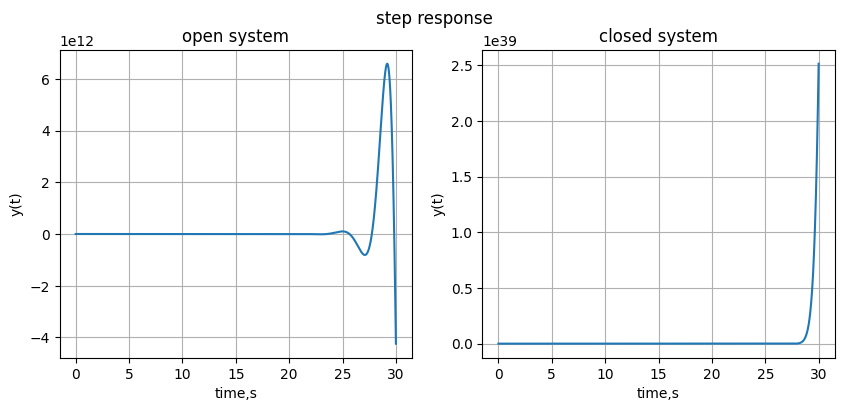

In [669]:
plot_time_char(open_ss1, closed_ss1, time_limit=30)

2

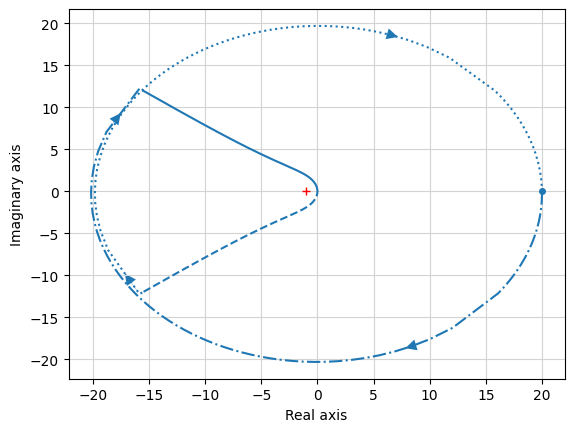

In [670]:
ct.nyquist(open_ss1)

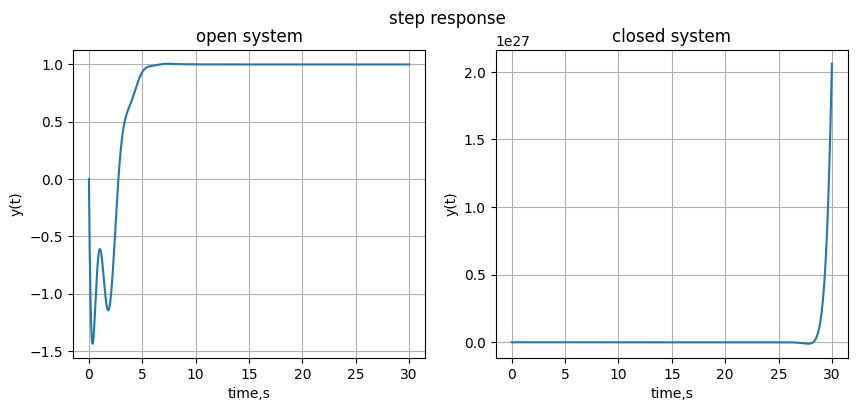

In [671]:
plot_time_char(open_ss2, closed_ss2, time_limit=30)

4

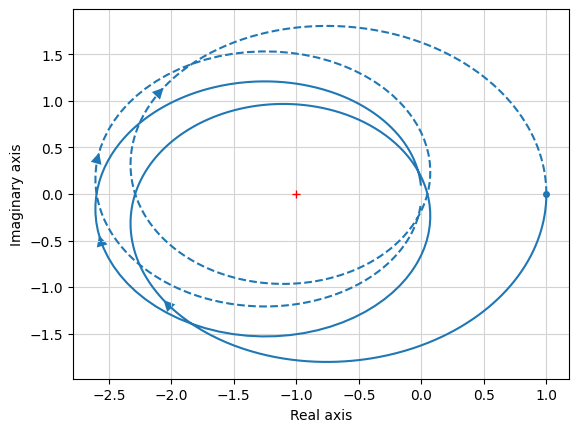

In [672]:
ct.nyquist(open_ss2)

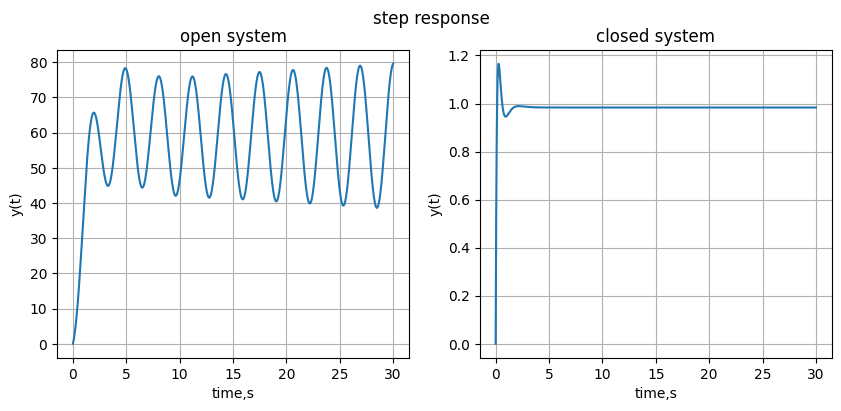

In [673]:
plot_time_char(open_ss3, closed_ss3, time_limit=30)

-2

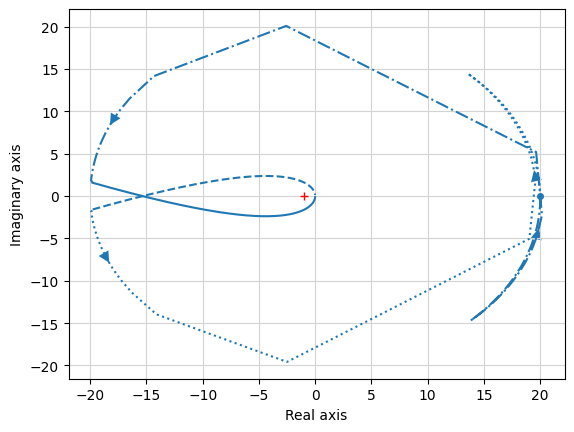

In [674]:
ct.nyquist(open_ss3)

# Задание 2

## Первая

In [675]:
w1 = (s-3) / (s**2 + 2*s + 6)
w1tf = sympy_frac_to_tf(w1)

In [676]:
max_k1 = ct.stability_margins(w1tf)[0]
ks1 = [max_k1/10, 0.8*max_k1, 1.2*max_k1]
max_k1

2.0

In [677]:
def nyquist_char_for_k(
        w,
        k
):
    count = ct.nyquist(k*w)
    plt.title(f'k: {k}, count: {count}')

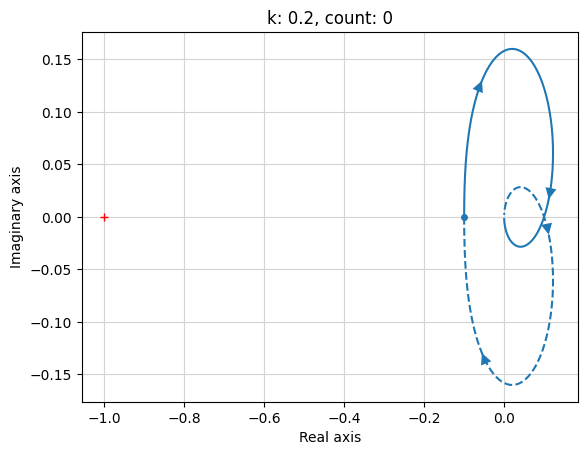

In [678]:
nyquist_char_for_k(w1tf,ks1[0])

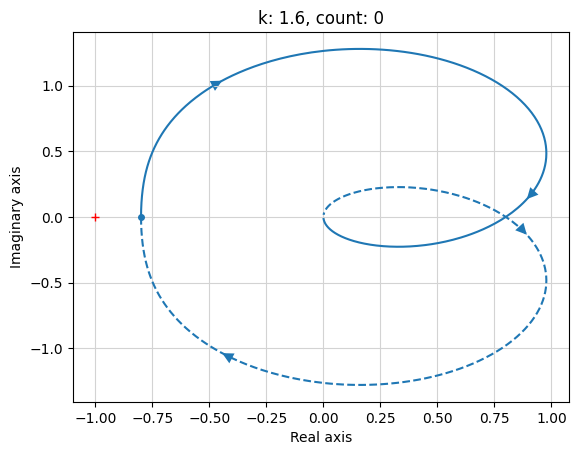

In [679]:
nyquist_char_for_k(w1tf,ks1[1])

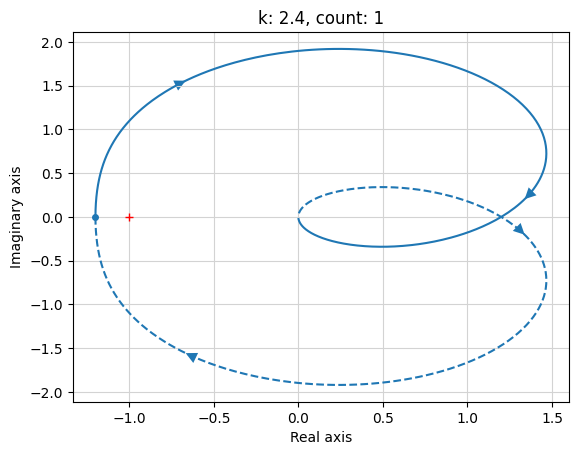

In [680]:
nyquist_char_for_k(w1tf,ks1[2])

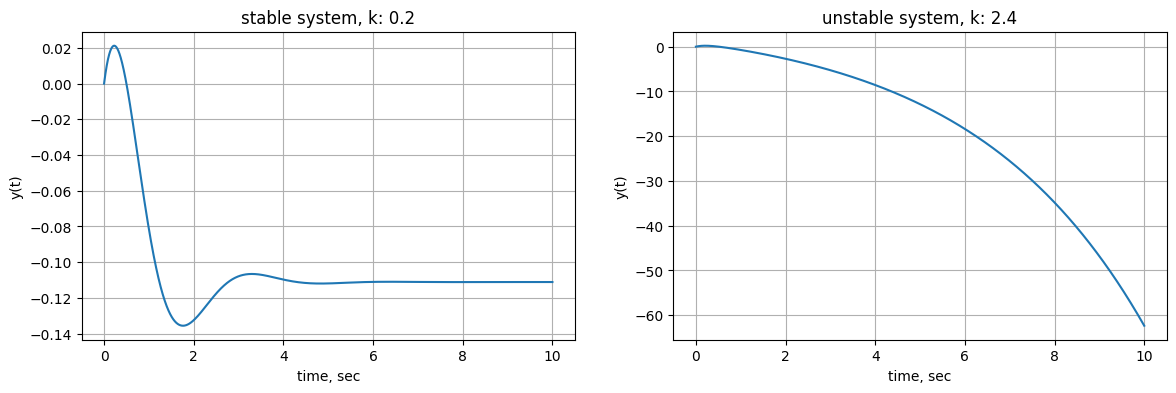

In [685]:
fig, ax = plt.subplots(1,2,figsize=(14,4))

sec = 10
time = np.linspace(0, sec, int(sec/dt))

ax[0].plot(time, ct.step_response(ct.feedback(ks1[0]*w1tf),time).outputs)
ax[0].set_title(f'stable system, k: {ks1[0]}')
ax[0].set_xlabel('time, sec')
ax[0].set_ylabel('y(t)')
ax[0].grid(True)

ax[1].plot(time, ct.step_response(ct.feedback(ks1[2]*w1tf),time).outputs)
ax[1].set_title(f'unstable system, k: {ks1[2]}')
ax[1].set_xlabel('time, sec')
ax[1].set_ylabel('y(t)')
ax[1].grid(True)

## Вторая

In [686]:
w2 = (10*s**3 - 13*s**2+10*s-2) / (10*s**3 + 14*s**2+5*s+0.5)
w2tf = sympy_frac_to_tf(w2)

In [687]:
max_k2 = ct.stability_margins(w2tf)[0]
max_k2 = round(max_k2,2)
ks2 = [max_k2/10, 0.8*max_k2, 1.2*max_k2]
max_k2

1.28

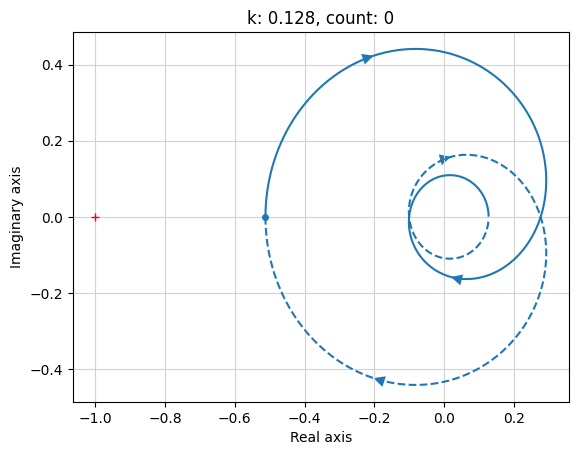

In [688]:
nyquist_char_for_k(w2tf,ks2[0])

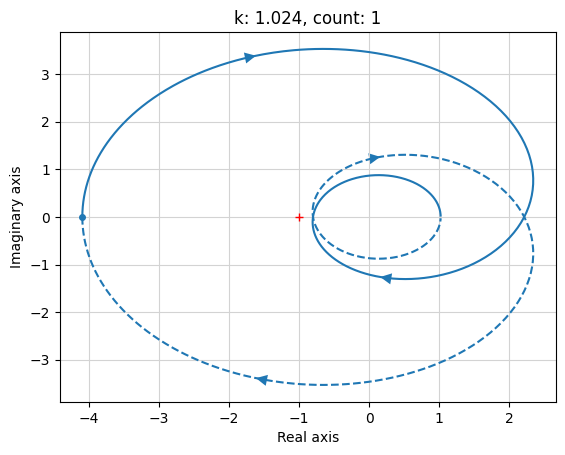

In [689]:
nyquist_char_for_k(w2tf,ks2[1])

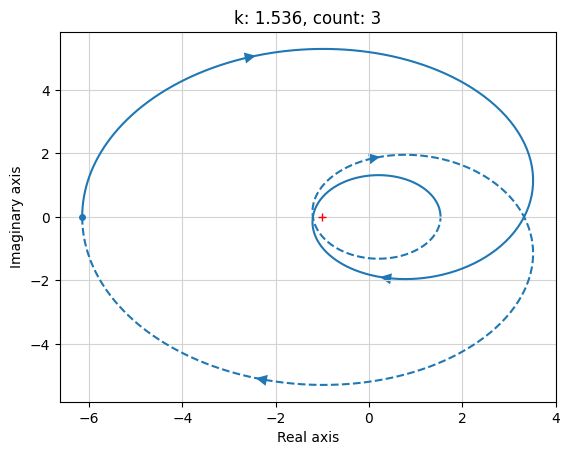

In [690]:
nyquist_char_for_k(w2tf,ks2[2])

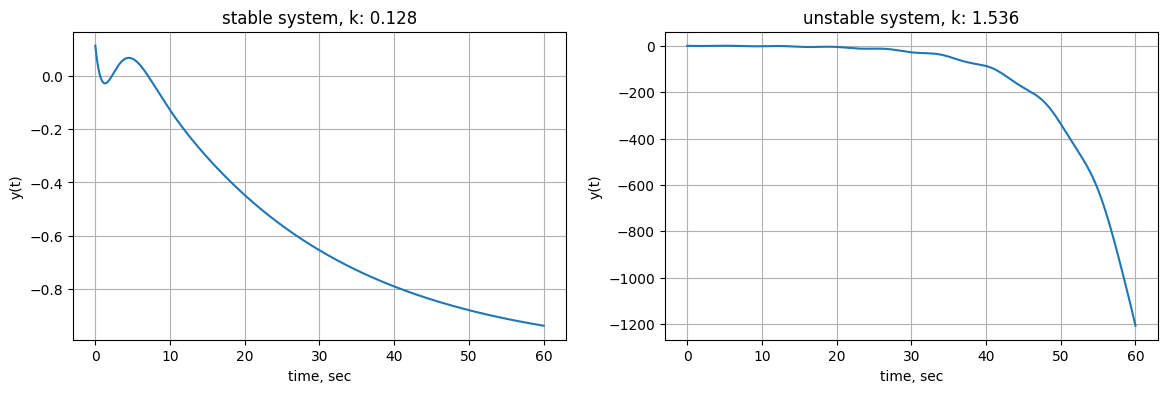

In [693]:
fig, ax = plt.subplots(1,2,figsize=(14,4))

sec = 60
time = np.linspace(0, sec, int(sec/dt))

ax[0].plot(time, ct.step_response(ct.feedback(ks2[0]*w2tf),time).outputs)
ax[0].set_title(f'stable system, k: {ks2[0]}')
ax[0].set_xlabel('time, sec')
ax[0].set_ylabel('y(t)')
ax[0].grid(True)

ax[1].plot(time, ct.step_response(ct.feedback(ks2[2]*w2tf),time).outputs)
ax[1].set_title(f'unstable system, k: {ks2[2]}')
ax[1].set_xlabel('time, sec')
ax[1].set_ylabel('y(t)')
ax[1].grid(True)

# Задание 3

In [755]:
delay0 = list(ct.pade(0))
delay1 = list(ct.pade(0.5))

In [766]:
w3 = (5*s+10) / (s**2+4)
w3tf = sympy_frac_to_tf(w3)

In [771]:
res = ct.stability_margins(w3tf)
tau_lim = round(np.deg2rad((res[1]) / (res[4])),2)
tau_lim

0.21

In [772]:
w3tau0 = ct.tf(*delay0) * sympy_frac_to_tf(w3)

Text(0.5, 1.0, '$\\tau$: 0, count: -2')

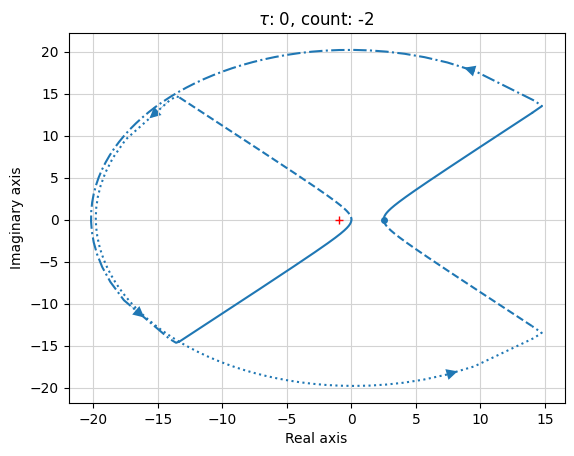

In [777]:
count = ct.nyquist(w3tau0)
plt.title(fr'$\tau$: 0, count: {count}')

In [778]:
w3tau05 = ct.tf(*delay1) * sympy_frac_to_tf(w3)

Text(0.5, 1.0, '$\\tau$: 0.5, count: 0')

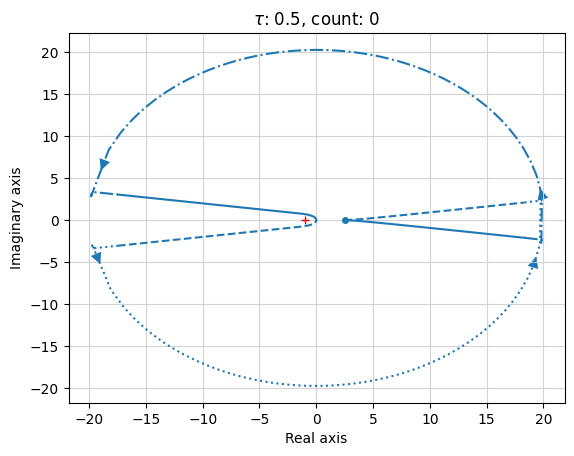

In [779]:
count = ct.nyquist(w3tau05)
plt.title(fr'$\tau$: 0.5, count: {count}')

In [783]:
delay2 = list(ct.pade(tau_lim))
w3tau_lim = ct.tf(*delay2) * w3tf

Text(0.5, 1.0, '$\\tau$: 0.21, count: -2')

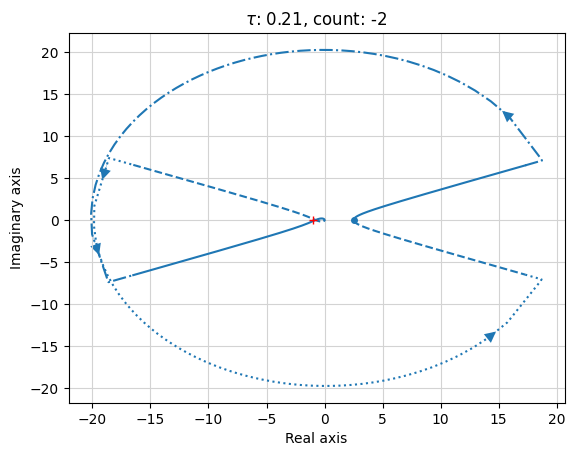

In [784]:
count = ct.nyquist(w3tau_lim)
plt.title(fr'$\tau$: {tau_lim}, count: {count}')

Text(0.5, 1.0, '$\\tau$: 3, count: 0')

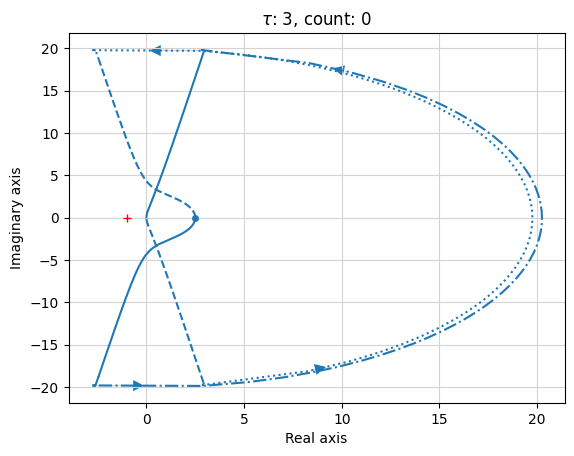

In [787]:
delay3 = list(ct.pade(3))
w3tau3 = ct.tf(*delay3) * w3tf
count = ct.nyquist(w3tau3)
plt.title(fr'$\tau$: {3}, count: {count}')

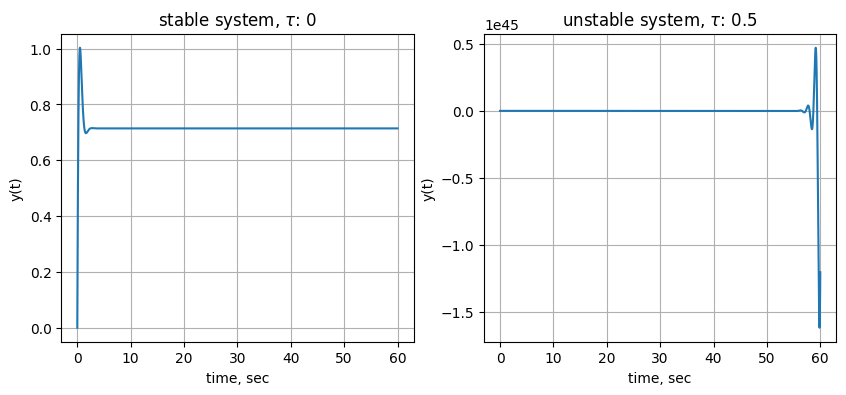

In [790]:
fig, ax = plt.subplots(1,2,figsize=(10,4))

sec = 60
time = np.linspace(0, sec, int(sec/dt))

ax[0].plot(time, ct.step_response(ct.feedback(w3tau0),time).outputs)
ax[0].set_title(fr'stable system, $\tau$: 0')
ax[0].set_xlabel('time, sec')
ax[0].set_ylabel('y(t)')
ax[0].grid(True)

ax[1].plot(time, ct.step_response(ct.feedback(w3tau05),time).outputs)
ax[1].set_title(fr'unstable system, $\tau$: 0.5')
ax[1].set_xlabel('time, sec')
ax[1].set_ylabel('y(t)')
ax[1].grid(True)

система 4

In [791]:
w4 = (8*s**2 + 4*s - 12) / (10*s**2-10*s+18)
w4tf = sympy_frac_to_tf(w4)

In [792]:
w4tau0 = ct.tf(*delay0) * w4tf

Text(0.5, 1.0, '$\\tau$: 0, count: 0')

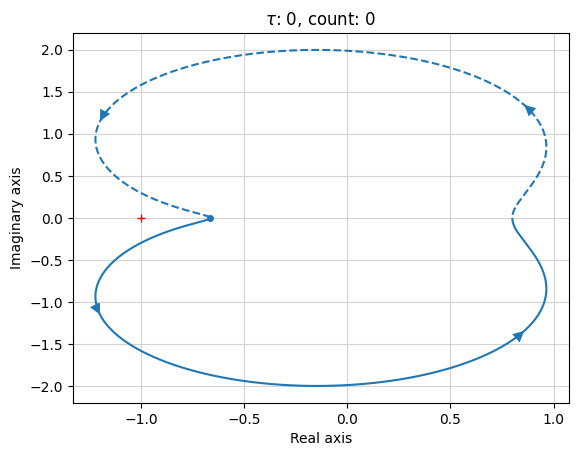

In [793]:
count = ct.nyquist(w4tau0)
plt.title(fr'$\tau$: 0, count: {count}')

In [794]:
w4tau05 = ct.tf(*delay1) * w4tf

Text(0.5, 1.0, '$\\tau$: 0.5, count: -2')

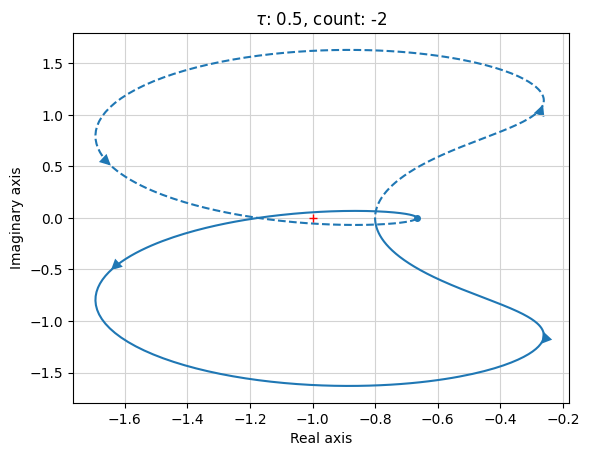

In [795]:
count = ct.nyquist(w4tau05)
plt.title(fr'$\tau$: 0.5, count: {count}')

In [796]:
res = ct.stability_margins(w4tf)
tau_lim = round(np.deg2rad((res[1]) / (res[4])),2)
delay24 = list(ct.pade(tau_lim))
w4tau_lim = ct.tf(*delay24) * w4tf
tau_lim

0.41

Text(0.5, 1.0, '$\\tau$: 0.41, count: 0')

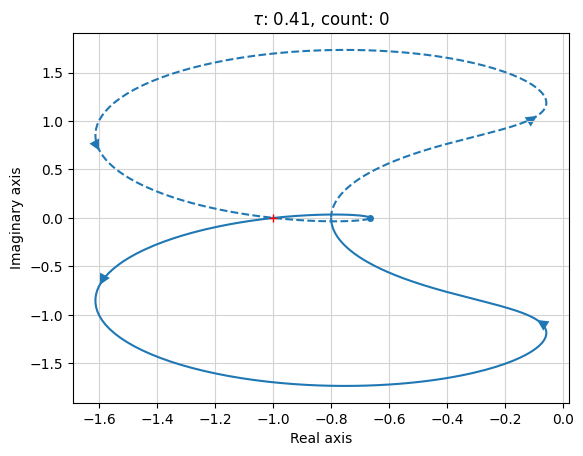

In [797]:
count = ct.nyquist(w4tau_lim)
plt.title(fr'$\tau$: {tau_lim}, count: {count}')

Text(0.5, 1.0, '$\\tau$: 4, count: -2')

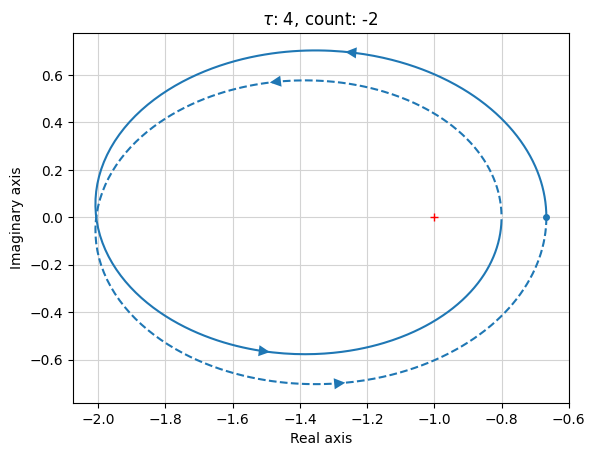

In [816]:
delay3 = list(ct.pade(1.3))
w4tau3 = ct.tf(*delay3) * w4tf
count = ct.nyquist(w4tau3)
plt.title(fr'$\tau$: {4}, count: {count}')

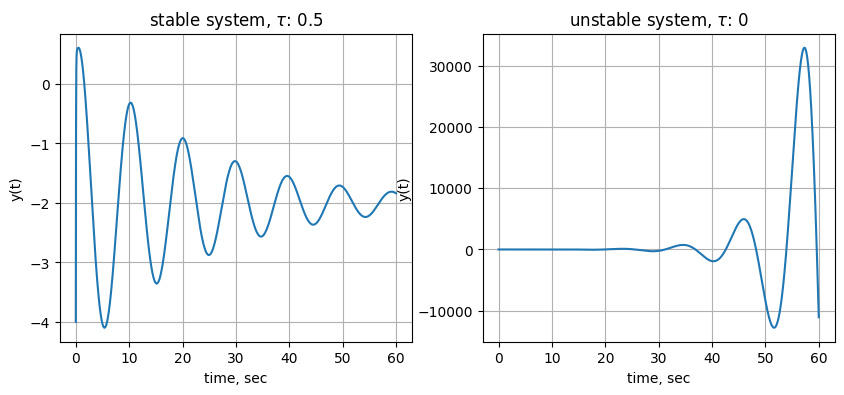

In [819]:
fig, ax = plt.subplots(1,2,figsize=(10,4))

sec = 60
time = np.linspace(0, sec, int(sec/dt))

ax[0].plot(time, ct.step_response(ct.feedback(w4tau05),time).outputs)
ax[0].set_title(fr'stable system, $\tau$: 0.5')
ax[0].set_xlabel('time, sec')
ax[0].set_ylabel('y(t)')
ax[0].grid(True)

ax[1].plot(time, ct.step_response(ct.feedback(w4tau0),time).outputs)
ax[1].set_title(fr'unstable system, $\tau$: 0')
ax[1].set_xlabel('time, sec')
ax[1].set_ylabel('y(t)')
ax[1].grid(True)